In [2]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [2]:
fileprefix = "pilot_3" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [3]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [4]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 5d3de459ab640c0018694a58
2 5ebf17adf3c3511355882e8a
3 debug7OUIn
4 5fc9ec3d0990d4501dfd7e05
5 60f6ccc8dc28e40d423f595d
6 5fb63121bfd2cb0b826d2e99
7 6116422e3fd768e0eb82fa98
8 60e2fbb1eec0ddbbe525aa49
9 61002d85a0e999eed53e30e8
10 613e4bf960ca68f8de00e5e7
11 5c4b42666634320001598ff4
12 616c4409a2bcfe1fdb942117
13 614dc91f0e0e6092ccbca846
14 5f6b6353dff00c0503b9f7e1
15 59c93d675e01580001977815
16 6047c853ca7cb206a40f555b
17 debugj5RTD
18 60f2be10f84eb35558463468
19 60fdcb486e092bc7c1d9c748
20 60ddfb3db6a71ad9ba75e387
21 603d4dbda4df1dbbe8cc13ee
22 6470dcc0efb43623b0480cc5
23 601c1a00178c02637f1659a1
24 5fdfd04b9bf07d83b2e5f780
25 61570d5eb2963a6d6ea3719a
26 6139ff0fdd642f8033b247d5
27 5e0d4d2d7605fe4d7fba6f5e
28 61224ccef1ce5b2169df0f44
29 60fd8d7167e1b2309cc590c1
30 debugHv2Ur
31 5f511bec133110302c132ada
32 debugfzkAF
33 5c4f4ce19eeaf00001598126
34 60dfcb70b6cede357105e6ed
35 60daf06339acaaccef1a00932
36 616eb493bb7e4ab4fa1de8d4
37 5c0fdebfdfbb180001c32177
38 608690e9fc999a08f141b708


In [5]:
part_data.keys()


dict_keys(['5d3de459ab640c0018694a58', '5ebf17adf3c3511355882e8a', '5fc9ec3d0990d4501dfd7e05', '60f6ccc8dc28e40d423f595d', '5fb63121bfd2cb0b826d2e99', '6116422e3fd768e0eb82fa98', '60e2fbb1eec0ddbbe525aa49', '61002d85a0e999eed53e30e8', '613e4bf960ca68f8de00e5e7', '5c4b42666634320001598ff4', '616c4409a2bcfe1fdb942117', '614dc91f0e0e6092ccbca846', '5f6b6353dff00c0503b9f7e1', '59c93d675e01580001977815', '6047c853ca7cb206a40f555b', '60f2be10f84eb35558463468', '60fdcb486e092bc7c1d9c748', '60ddfb3db6a71ad9ba75e387', '603d4dbda4df1dbbe8cc13ee', '6470dcc0efb43623b0480cc5', '601c1a00178c02637f1659a1', '5fdfd04b9bf07d83b2e5f780', '61570d5eb2963a6d6ea3719a', '6139ff0fdd642f8033b247d5', '5e0d4d2d7605fe4d7fba6f5e', '61224ccef1ce5b2169df0f44', '60fd8d7167e1b2309cc590c1', '5f511bec133110302c132ada', '5c4f4ce19eeaf00001598126', '60dfcb70b6cede357105e6ed', '60daf06339acaaccef1a00932', '616eb493bb7e4ab4fa1de8d4', '5c0fdebfdfbb180001c32177', '608690e9fc999a08f141b708', '60957c141c93ecc64fe6b4ea', '5fa061e

# Reading Data from Already Created Participant Data Files

In [3]:
fileprefix = "pilot_3" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [4]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [5]:
len(part_data.keys())

74

# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [6]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']
                    
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial

    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

6160ccb0810a73f90ef4c5e7
61066e991d3b7cc1eacf2a53
61066e991d3b7cc1eacf2a53 mdp
6310b43bd9f974e46765836b
6116422e3fd768e0eb82fa98
5ed3b2b3397ebb01e2c64923
5ed3b2b3397ebb01e2c64923 mdp
5e0d4d2d7605fe4d7fba6f5e
612296b87416dfaf670907cd
5c0fdebfdfbb180001c32177
No data
59c93d675e01580001977815
59c93d675e01580001977815 mdp
601c1a00178c02637f1659a1
601c1a00178c02637f1659a1 mdp
60dec770e794837d68214ae1
5fc9ec3d0990d4501dfd7e05
6120b4fca2fedeb88787374c
610b743b3f893111e9fa3986
610b743b3f893111e9fa3986 mdp
5fa061eeb1f28d08b4e40501
60e6e91bf2974c65f8296342
60dfcb70b6cede357105e6ed
5c4f4ce19eeaf00001598126
616c4409a2bcfe1fdb942117
60d77edd5ede206b58b8b9c8
5d616bd447787f000175cd9e
60daf06339acaaccef1a00932
60daf06339acaaccef1a00932 mdp
5fdfd04b9bf07d83b2e5f780
5ea98f445ef6ee093f4f05ec
60f2be10f84eb35558463468
61570d5eb2963a6d6ea3719a
61570d5eb2963a6d6ea3719a mdp
60475f804d6ac923410a4b12
5e083e0a35a7a5178670e03e
616eb493bb7e4ab4fa1de8d4
611e1cb0e8882a2a1e9f456d
60d101464180f5f5cd211e77
5efbe7a1cae4

In [7]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

73


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2660.000,2645.000,0,1.0,40,1826.164,2224.20,0,None,True,3,0,True
1,61066e991d3b7cc1eacf2a53,2023-07-10 13:57:49.569212,1066.172,1066.172,1,1.0,30,833.582,-105.35,0,mdp,False,6,-1,False
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,4252.000,4242.000,1,1.0,40,3779.878,1797.85,0,None,True,3,0,True
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2589.000,2332.000,1,1.0,40,1799.648,2123.60,0,None,True,3,1,True
4,5ed3b2b3397ebb01e2c64923,2023-07-10 13:59:13.534306,686.770,686.770,0,3.0,0,529.216,0.00,0,mdp,False,6,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,5ff6d9ee8c6cb429d55ea0fa,2023-07-10 13:57:26.485826,1814.000,1807.000,0,1.0,40,1239.673,213.20,0,None,True,3,0,True
69,613e4bf960ca68f8de00e5e7,2023-07-10 14:31:10.475116,1687.000,1676.000,0,1.0,40,1297.736,2243.80,0,None,True,3,0,True
70,60957c141c93ecc64fe6b4ea,2023-07-10 13:55:28.522361,3409.000,3391.000,1,1.0,40,2950.954,1946.70,0,None,True,3,0,True
71,6070c2f8aa9a08d466b86d5c,2023-07-10 13:58:39.906441,261.209,261.209,0,2.0,0,149.868,0.00,0,mdp,False,6,-1,False


In [8]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

1


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
32,60e2fbb1eec0ddbbe525aa49,2023-07-10 15:03:31.812540,NaT,2023-07-10 15:03:47.521009,2,chrome,windows,en-AU,42.325,42.325,...,,,,0,None,0.0,0.0,-42.325,NaN,NaN


In [9]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

72


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2023-07-10 14:43:40.481753,2023-07-10 13:59:34.806782,3,chrome,windows,en-ZA,2660.000,2645.000,...,"Firstly, I was clicking step by step until I r...",Yes. I learned possible ways to reduce lose an...,It was easy to learn from my experience along ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",2224.20,1826.164,-818.836,37418.775000,0.0
1,61066e991d3b7cc1eacf2a53,2023-07-10 13:57:49.569212,NaT,2023-07-10 13:57:57.048557,6,safari,macos,de-DE,1066.172,1066.172,...,,,,0,None,-105.35,833.582,-232.590,23250.433333,0.0
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,2023-07-10 15:11:02.134611,2023-07-10 14:00:19.332677,3,chrome,windows,ru-RU,4252.000,4242.000,...,Choosing one branch and clicking the last node...,Yes. I stopped clicking on the closest nodes a...,I figured it about half way through. So 50/50 ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1797.85,3779.878,-462.122,89182.700000,0.0
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2023-07-10 14:47:02.625006,2023-07-10 14:08:09.999236,3,chrome,windows,pt-PT,2589.000,2332.000,...,Firstly I saw which was the path that gave me ...,"Yes, initially just saw the end nodes. Then st...",I think in the begining is hard to understand ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2123.60,1799.648,-532.352,39792.375000,0.0
4,5ed3b2b3397ebb01e2c64923,2023-07-10 13:59:13.534306,NaT,2023-07-10 13:59:24.971077,6,firefox,linux,pt-PT,686.770,686.770,...,,,,0,None,0.00,529.216,-157.554,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,5ff6d9ee8c6cb429d55ea0fa,2023-07-10 13:57:26.485826,2023-07-10 14:27:40.544392,2023-07-10 13:57:32.625518,3,chrome,windows,en-GB,1814.000,1807.000,...,"I didn't reveal many nodes, I tried to use my...",Not really,It was quite difficult as the nodes had differ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",213.20,1239.673,-567.327,27170.225000,0.0
69,613e4bf960ca68f8de00e5e7,2023-07-10 14:31:10.475116,2023-07-10 14:59:18.451120,2023-07-10 14:31:22.162182,3,chrome,windows,en-US,1687.000,1676.000,...,I always looked at the last nodes because they...,"Yes, at first I looked at the closest nodes an...","It wasn't hard, I just needed to get lucky and...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",2243.80,1297.736,-378.264,28295.075000,0.0
70,60957c141c93ecc64fe6b4ea,2023-07-10 13:55:28.522361,2023-07-10 14:52:17.600739,2023-07-10 13:55:46.382025,3,chrome,windows,en-GB,3409.000,3391.000,...,I just clicked on random nodes and hoped for t...,"I don't think so, I just spent money on nodes","It wasn't too bad, if you don't mind losing a ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",1946.70,2950.954,-440.046,64326.350000,0.0
71,6070c2f8aa9a08d466b86d5c,2023-07-10 13:58:39.906441,NaT,2023-07-10 13:58:47.280750,6,opera,windows,pl-PL,261.209,261.209,...,,,,0,None,0.00,149.868,-111.341,NaN,NaN


In [10]:
# Partial compensation rates

gbp_hourly = 6.00
secondly_rate = gbp_hourly / (3600)

In [11]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']), row['condition'])
    
early_quitters

2
59c93d675e01580001977815, 0.78 0
60daf06339acaaccef1a00932, 0.01 0


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_7524/3936591574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
7,59c93d675e01580001977815,2023-07-10 13:57:49.904289,NaT,2023-07-10 13:58:02.046527,6,chrome,linux,en-US,470.261,470.261,...,,,0,None,0.0,0.0,-470.261,NaN,NaN,0.783768
20,60daf06339acaaccef1a00932,2023-07-10 13:46:14.431519,NaT,2023-07-10 13:46:17.651489,6,chrome,macos,en-US,6.912,6.912,...,,,0,None,0.0,0.0,-6.912,NaN,NaN,0.011520


In [12]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

11
5ed3b2b3397ebb01e2c64923, 0.88
601c1a00178c02637f1659a1, 0.42
61570d5eb2963a6d6ea3719a, 0.84
61224ccef1ce5b2169df0f44, 1.93
6482f8b93bfd2bc0f245e504, 0.35
5f98383ec3a3c80b6c8190a6, 0.22
6005a70567c8e981ead530b5, 0.30
60f579085ebf24f9c80f223e, 0.24
608690e9fc999a08f141b708, 0.44
616cdeebd38a9ca9cdc4b481, 3.23
6070c2f8aa9a08d466b86d5c, 0.25


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_7524/3569009787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
4,5ed3b2b3397ebb01e2c64923,2023-07-10 13:59:13.534306,NaT,2023-07-10 13:59:24.971077,6,firefox,linux,pt-PT,686.770,686.770,...,,,0,None,0.0,529.216,-157.554,NaN,NaN,0.882027
8,601c1a00178c02637f1659a1,2023-07-10 13:56:46.197736,NaT,2023-07-10 13:57:12.339207,6,firefox,windows,pt-PT,476.592,476.592,...,,,0,None,0.0,254.884,-221.708,NaN,NaN,0.424807
24,61570d5eb2963a6d6ea3719a,2023-07-10 14:06:01.090991,NaT,2023-07-10 14:06:23.122755,6,chrome,windows,en-GB,663.856,663.856,...,,,0,None,0.0,503.011,-160.845,NaN,NaN,0.838352
33,61224ccef1ce5b2169df0f44,2023-07-10 14:06:51.097168,2023-07-10 14:29:53.116911,2023-07-10 14:07:00.843184,3,chrome,windows,en-GB,1382.000,1372.000,...,,,0,None,0.0,1160.042,-211.958,NaN,NaN,1.933403
36,6482f8b93bfd2bc0f245e504,2023-07-10 13:59:33.634148,NaT,2023-07-10 13:59:40.935270,6,chrome,windows,nl-NL,369.532,369.532,...,,,0,None,0.0,207.149,-162.383,NaN,NaN,0.345248
44,5f98383ec3a3c80b6c8190a6,2023-07-10 13:55:59.896706,NaT,2023-07-10 13:56:05.341380,6,chrome,windows,pt-PT,162.384,162.384,...,,,0,None,0.0,131.625,-30.759,NaN,NaN,0.219375
49,6005a70567c8e981ead530b5,2023-07-10 13:58:26.808317,NaT,2023-07-10 13:58:55.914684,6,chrome,windows,pt-PT,399.697,399.697,...,,,0,None,0.0,178.537,-221.160,NaN,NaN,0.297562
53,60f579085ebf24f9c80f223e,2023-07-10 13:55:19.926413,NaT,2023-07-10 13:55:31.536617,6,chrome,windows,en-US,206.001,206.001,...,,,0,None,0.0,146.919,-59.082,NaN,NaN,0.244865
55,608690e9fc999a08f141b708,2023-07-10 13:54:53.525711,NaT,2023-07-10 13:55:06.089243,6,chrome,windows,nl-NL,405.002,405.002,...,,,0,None,0.0,262.501,-142.501,NaN,NaN,0.437502
65,616cdeebd38a9ca9cdc4b481,2023-07-10 13:58:55.243393,2023-07-10 14:37:02.057437,2023-07-10 13:59:13.079129,3,chrome,windows,en-US,2286.000,2268.000,...,,,0,None,0.0,1940.702,-327.298,NaN,NaN,3.234503


In [13]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
4,5ed3b2b3397ebb01e2c64923,3.0,mdp,0
8,601c1a00178c02637f1659a1,1.0,mdp,0
24,61570d5eb2963a6d6ea3719a,2.0,mdp,0
33,61224ccef1ce5b2169df0f44,4.0,mdp,0
36,6482f8b93bfd2bc0f245e504,1.0,mdp,0
44,5f98383ec3a3c80b6c8190a6,1.0,mdp,0
49,6005a70567c8e981ead530b5,1.0,mdp,0
53,60f579085ebf24f9c80f223e,1.0,mdp,0
55,608690e9fc999a08f141b708,1.0,mdp,0
65,616cdeebd38a9ca9cdc4b481,4.0,mdp,0


In [14]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5ed3b2b3397ebb01e2c64923	0
601c1a00178c02637f1659a1	0
61570d5eb2963a6d6ea3719a	0
61224ccef1ce5b2169df0f44	0
6482f8b93bfd2bc0f245e504	0
5f98383ec3a3c80b6c8190a6	0
6005a70567c8e981ead530b5	1
60f579085ebf24f9c80f223e	1
608690e9fc999a08f141b708	1
616cdeebd38a9ca9cdc4b481	0
6070c2f8aa9a08d466b86d5c	0


In [15]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

59


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2023-07-10 14:43:40.481753,2023-07-10 13:59:34.806782,3,chrome,windows,en-ZA,2660.000,2645.000,...,"Firstly, I was clicking step by step until I r...",Yes. I learned possible ways to reduce lose an...,It was easy to learn from my experience along ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",2224.20,1826.164,-818.836,37418.775000,0.0
1,61066e991d3b7cc1eacf2a53,2023-07-10 13:57:49.569212,NaT,2023-07-10 13:57:57.048557,6,safari,macos,de-DE,1066.172,1066.172,...,,,,0,None,-105.35,833.582,-232.590,23250.433333,0.0
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,2023-07-10 15:11:02.134611,2023-07-10 14:00:19.332677,3,chrome,windows,ru-RU,4252.000,4242.000,...,Choosing one branch and clicking the last node...,Yes. I stopped clicking on the closest nodes a...,I figured it about half way through. So 50/50 ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1797.85,3779.878,-462.122,89182.700000,0.0
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2023-07-10 14:47:02.625006,2023-07-10 14:08:09.999236,3,chrome,windows,pt-PT,2589.000,2332.000,...,Firstly I saw which was the path that gave me ...,"Yes, initially just saw the end nodes. Then st...",I think in the begining is hard to understand ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2123.60,1799.648,-532.352,39792.375000,0.0
5,5e0d4d2d7605fe4d7fba6f5e,2023-07-10 14:18:19.384509,2023-07-10 14:43:26.781634,2023-07-10 14:18:26.282710,3,chrome,windows,pt-PT,1507.000,1500.000,...,"The strategy was clicking on the edges, withou...","Yes, I started very anxious but once I got the...",Not very difficult.,0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",1410.40,1188.170,-311.830,24623.175000,0.0
6,612296b87416dfaf670907cd,2023-07-10 13:59:40.866135,2023-07-10 14:26:43.127563,2023-07-10 13:59:47.085010,3,chrome,windows,pt-PT,1622.000,1616.000,...,I tried to find the path which led to higher s...,"I focused on the last nodes, instead of the fi...",No problem,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",838.00,1453.350,-162.650,24036.625000,0.0
9,60dec770e794837d68214ae1,2023-07-10 13:57:25.367793,2023-07-10 14:43:40.736900,2023-07-10 13:57:31.791579,3,chrome,windows,en-US,2775.000,2768.000,...,Check last nodes.\naccording to the points in ...,"Yes, at first i thought i could only discover ...","Not difficult at all, just needed more practice.",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1425.80,2198.090,-569.910,49358.625000,0.0
10,5fc9ec3d0990d4501dfd7e05,2023-07-10 14:04:07.997689,2023-07-10 14:52:25.890599,2023-07-10 14:04:19.185334,3,chrome,windows,en-US,2897.000,2886.000,...,I tried to find the best value as soon as poss...,I don't think i needed to improve my strategy ...,It was difficult because there was an element ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1633.75,1521.455,-1364.545,28704.500000,0.0
11,6120b4fca2fedeb88787374c,2023-07-10 13:59:27.144597,2023-07-10 14:41:01.465959,2023-07-10 14:00:09.089518,3,chrome,windows,en-US,2494.000,2452.000,...,"letting the note inspector display its value, ...",definitely. I realised the end values matter m...,it wasn't difficult.,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1231.60,1802.084,-649.916,36737.825000,0.0
12,610b743b3f893111e9fa3986,2023-07-10 13:57:44.108448,NaT,2023-07-10 13:57:50.763105,6,safari,macos,en-US,1426.413,1426.413,...,,,,0,None,873.60,1239.172,-187.241,31691.600000,0.0


In [16]:
data_actually_complete = []

In [17]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint"]]

3


,workerId,numTrialsCompleted,dropoutPoint
1,61066e991d3b7cc1eacf2a53,30,mdp
12,610b743b3f893111e9fa3986,30,mdp
50,60fdcb486e092bc7c1d9c748,0,mdp


In [18]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

61066e991d3b7cc1eacf2a53	1
610b743b3f893111e9fa3986	0
60fdcb486e092bc7c1d9c748	0


In [19]:
data_actually_complete = []

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = ["610b743b3f893111e9fa3986", "61066e991d3b7cc1eacf2a53"]


In [20]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']), row['condition'])
incomplete_partial

2
61066e991d3b7cc1eacf2a53, 1.39 1
610b743b3f893111e9fa3986, 2.07 0


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_7524/3429525436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
1,61066e991d3b7cc1eacf2a53,2023-07-10 13:57:49.569212,NaT,2023-07-10 13:57:57.048557,6,safari,macos,de-DE,1066.172,1066.172,...,,,0,None,-105.35,833.582,-232.590,23250.433333,0.0,1.389303
12,610b743b3f893111e9fa3986,2023-07-10 13:57:44.108448,NaT,2023-07-10 13:57:50.763105,6,safari,macos,en-US,1426.413,1426.413,...,,,0,None,873.60,1239.172,-187.241,31691.600000,0.0,2.065287


In [21]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
complete_data

25
31


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2023-07-10 14:43:40.481753,2023-07-10 13:59:34.806782,3,chrome,windows,en-ZA,2660.0,2645.0,...,"Firstly, I was clicking step by step until I r...",Yes. I learned possible ways to reduce lose an...,It was easy to learn from my experience along ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",2224.20,1826.164,-818.836,37418.775,0.0
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,2023-07-10 15:11:02.134611,2023-07-10 14:00:19.332677,3,chrome,windows,ru-RU,4252.0,4242.0,...,Choosing one branch and clicking the last node...,Yes. I stopped clicking on the closest nodes a...,I figured it about half way through. So 50/50 ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1797.85,3779.878,-462.122,89182.700,0.0
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2023-07-10 14:47:02.625006,2023-07-10 14:08:09.999236,3,chrome,windows,pt-PT,2589.0,2332.0,...,Firstly I saw which was the path that gave me ...,"Yes, initially just saw the end nodes. Then st...",I think in the begining is hard to understand ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2123.60,1799.648,-532.352,39792.375,0.0
5,5e0d4d2d7605fe4d7fba6f5e,2023-07-10 14:18:19.384509,2023-07-10 14:43:26.781634,2023-07-10 14:18:26.282710,3,chrome,windows,pt-PT,1507.0,1500.0,...,"The strategy was clicking on the edges, withou...","Yes, I started very anxious but once I got the...",Not very difficult.,0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",1410.40,1188.170,-311.830,24623.175,0.0
6,612296b87416dfaf670907cd,2023-07-10 13:59:40.866135,2023-07-10 14:26:43.127563,2023-07-10 13:59:47.085010,3,chrome,windows,pt-PT,1622.0,1616.0,...,I tried to find the path which led to higher s...,"I focused on the last nodes, instead of the fi...",No problem,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",838.00,1453.350,-162.650,24036.625,0.0
9,60dec770e794837d68214ae1,2023-07-10 13:57:25.367793,2023-07-10 14:43:40.736900,2023-07-10 13:57:31.791579,3,chrome,windows,en-US,2775.0,2768.0,...,Check last nodes.\naccording to the points in ...,"Yes, at first i thought i could only discover ...","Not difficult at all, just needed more practice.",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1425.80,2198.090,-569.910,49358.625,0.0
10,5fc9ec3d0990d4501dfd7e05,2023-07-10 14:04:07.997689,2023-07-10 14:52:25.890599,2023-07-10 14:04:19.185334,3,chrome,windows,en-US,2897.0,2886.0,...,I tried to find the best value as soon as poss...,I don't think i needed to improve my strategy ...,It was difficult because there was an element ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1633.75,1521.455,-1364.545,28704.500,0.0
11,6120b4fca2fedeb88787374c,2023-07-10 13:59:27.144597,2023-07-10 14:41:01.465959,2023-07-10 14:00:09.089518,3,chrome,windows,en-US,2494.0,2452.0,...,"letting the note inspector display its value, ...",definitely. I realised the end values matter m...,it wasn't difficult.,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1231.60,1802.084,-649.916,36737.825,0.0
13,5fa061eeb1f28d08b4e40501,2023-07-10 13:55:35.997419,2023-07-10 14:35:24.843791,2023-07-10 13:55:42.905955,3,opera,windows,pl-PL,2388.0,2381.0,...,"Firstly, i was checking the closest nodes, to ...","After understanding the algorythm, I proceeded...",The only difficult part is remembering and kno...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2468.20,1634.571,-746.429,34259.750,0.0
14,60e6e91bf2974c65f8296342,2023-07-10 13:53:27.446888,2023-07-10 14:25:10.560233,2023-07-10 13:53:35.575714,3,opera,windows,es-ES,1903.0,1894.0,...,I ignore the closest nodes to the starting poi...,I perfectioned my strategy every round until I...,Not that much. It's just trial and error

In [22]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

6160ccb0810a73f90ef4c5e7	0
6310b43bd9f974e46765836b	1
6116422e3fd768e0eb82fa98	1
5e0d4d2d7605fe4d7fba6f5e	0
612296b87416dfaf670907cd	1
60dec770e794837d68214ae1	1
5fc9ec3d0990d4501dfd7e05	1
6120b4fca2fedeb88787374c	0
5fa061eeb1f28d08b4e40501	0
60e6e91bf2974c65f8296342	1
60dfcb70b6cede357105e6ed	1
5c4f4ce19eeaf00001598126	0
616c4409a2bcfe1fdb942117	1
60d77edd5ede206b58b8b9c8	0
5d616bd447787f000175cd9e	1
5fdfd04b9bf07d83b2e5f780	1
5ea98f445ef6ee093f4f05ec	0
60f2be10f84eb35558463468	0
60475f804d6ac923410a4b12	0
5e083e0a35a7a5178670e03e	0
616eb493bb7e4ab4fa1de8d4	1
611e1cb0e8882a2a1e9f456d	0
60d101464180f5f5cd211e77	1
5efbe7a1cae4551978ab74bd	1
5c38658f3ce2c800011225ce	1
610401cb3f635573ecf3656d	1
614dc91f0e0e6092ccbca846	0
5ee3348f8cfe2d49e6dc98ff	1
60fd8d7167e1b2309cc590c1	1
5f6b6353dff00c0503b9f7e1	0
61002d85a0e999eed53e30e8	0
5ea9ac27abf6101099ff0360	1
5f9fc753be94016201d471fc	1
6154c3637bd4c9657a4a6685	1
60f6ccc8dc28e40d423f595d	0
6130e7fbab76b9d373330912	0
607b1c2ef44dc9730cd03b63	0
5

In [23]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

56


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2023-07-10 14:43:40.481753,2023-07-10 13:59:34.806782,3,chrome,windows,en-ZA,2660.0,2645.0,...,"Firstly, I was clicking step by step until I r...",Yes. I learned possible ways to reduce lose an...,It was easy to learn from my experience along ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",2224.20,1826.164,-818.836,37418.775,0.0
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,2023-07-10 15:11:02.134611,2023-07-10 14:00:19.332677,3,chrome,windows,ru-RU,4252.0,4242.0,...,Choosing one branch and clicking the last node...,Yes. I stopped clicking on the closest nodes a...,I figured it about half way through. So 50/50 ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1797.85,3779.878,-462.122,89182.700,0.0
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2023-07-10 14:47:02.625006,2023-07-10 14:08:09.999236,3,chrome,windows,pt-PT,2589.0,2332.0,...,Firstly I saw which was the path that gave me ...,"Yes, initially just saw the end nodes. Then st...",I think in the begining is hard to understand ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2123.60,1799.648,-532.352,39792.375,0.0
5,5e0d4d2d7605fe4d7fba6f5e,2023-07-10 14:18:19.384509,2023-07-10 14:43:26.781634,2023-07-10 14:18:26.282710,3,chrome,windows,pt-PT,1507.0,1500.0,...,"The strategy was clicking on the edges, withou...","Yes, I started very anxious but once I got the...",Not very difficult.,0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",1410.40,1188.170,-311.830,24623.175,0.0
6,612296b87416dfaf670907cd,2023-07-10 13:59:40.866135,2023-07-10 14:26:43.127563,2023-07-10 13:59:47.085010,3,chrome,windows,pt-PT,1622.0,1616.0,...,I tried to find the path which led to higher s...,"I focused on the last nodes, instead of the fi...",No problem,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",838.00,1453.350,-162.650,24036.625,0.0
9,60dec770e794837d68214ae1,2023-07-10 13:57:25.367793,2023-07-10 14:43:40.736900,2023-07-10 13:57:31.791579,3,chrome,windows,en-US,2775.0,2768.0,...,Check last nodes.\naccording to the points in ...,"Yes, at first i thought i could only discover ...","Not difficult at all, just needed more practice.",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1425.80,2198.090,-569.910,49358.625,0.0
10,5fc9ec3d0990d4501dfd7e05,2023-07-10 14:04:07.997689,2023-07-10 14:52:25.890599,2023-07-10 14:04:19.185334,3,chrome,windows,en-US,2897.0,2886.0,...,I tried to find the best value as soon as poss...,I don't think i needed to improve my strategy ...,It was difficult because there was an element ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1633.75,1521.455,-1364.545,28704.500,0.0
11,6120b4fca2fedeb88787374c,2023-07-10 13:59:27.144597,2023-07-10 14:41:01.465959,2023-07-10 14:00:09.089518,3,chrome,windows,en-US,2494.0,2452.0,...,"letting the note inspector display its value, ...",definitely. I realised the end values matter m...,it wasn't difficult.,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1231.60,1802.084,-649.916,36737.825,0.0
13,5fa061eeb1f28d08b4e40501,2023-07-10 13:55:35.997419,2023-07-10 14:35:24.843791,2023-07-10 13:55:42.905955,3,opera,windows,pl-PL,2388.0,2381.0,...,"Firstly, i was checking the closest nodes, to ...","After understanding the algorythm, I proceeded...",The only difficult part is remembering and kno...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2468.20,1634.571,-746.429,34259.750,0.0
14,60e6e91bf2974c65f8296342,2023-07-10 13:53:27.446888,2023-07-10 14:25:10.560233,2023-07-10 13:53:35.575714,3,opera,windows,es-ES,1903.0,1894.0,...,I ignore the closest nodes to the starting poi...,I perfectioned my strategy every round until I...,Not that much. It's just trial and error

In [24]:
#full_bonus_eligible.loc[full_bonus_eligible.workerId == "5f6214a59413141f7cb2508c"]

In [25]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

fix_bonus_rate = True
fixed_bonus_rate = 0.0008


bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    if not fix_bonus_rate:
        bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()
    else:
        bonus_rate[condition] = fixed_bonus_rate

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
0,6160ccb0810a73f90ef4c5e7,2023-07-10 13:59:20.070738,2023-07-10 14:43:40.481753,2023-07-10 13:59:34.806782,3,chrome,windows,en-ZA,2660.0,2645.0,...,Yes. I learned possible ways to reduce lose an...,It was easy to learn from my experience along ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",2224.20,1826.164,-818.836,37418.775,0.0,1.77936
2,6310b43bd9f974e46765836b,2023-07-10 14:00:09.201824,2023-07-10 15:11:02.134611,2023-07-10 14:00:19.332677,3,chrome,windows,ru-RU,4252.0,4242.0,...,Yes. I stopped clicking on the closest nodes a...,I figured it about half way through. So 50/50 ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1797.85,3779.878,-462.122,89182.700,0.0,1.43828
3,6116422e3fd768e0eb82fa98,2023-07-10 14:03:53.062483,2023-07-10 14:47:02.625006,2023-07-10 14:08:09.999236,3,chrome,windows,pt-PT,2589.0,2332.0,...,"Yes, initially just saw the end nodes. Then st...",I think in the begining is hard to understand ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2123.60,1799.648,-532.352,39792.375,0.0,1.69888
5,5e0d4d2d7605fe4d7fba6f5e,2023-07-10 14:18:19.384509,2023-07-10 14:43:26.781634,2023-07-10 14:18:26.282710,3,chrome,windows,pt-PT,1507.0,1500.0,...,"Yes, I started very anxious but once I got the...",Not very difficult.,0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",1410.40,1188.170,-311.830,24623.175,0.0,1.12832
6,612296b87416dfaf670907cd,2023-07-10 13:59:40.866135,2023-07-10 14:26:43.127563,2023-07-10 13:59:47.085010,3,chrome,windows,pt-PT,1622.0,1616.0,...,"I focused on the last nodes, instead of the fi...",No problem,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",838.00,1453.350,-162.650,24036.625,0.0,0.67040
9,60dec770e794837d68214ae1,2023-07-10 13:57:25.367793,2023-07-10 14:43:40.736900,2023-07-10 13:57:31.791579,3,chrome,windows,en-US,2775.0,2768.0,...,"Yes, at first i thought i could only discover ...","Not difficult at all, just needed more practice.",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1425.80,2198.090,-569.910,49358.625,0.0,1.14064
10,5fc9ec3d0990d4501dfd7e05,2023-07-10 14:04:07.997689,2023-07-10 14:52:25.890599,2023-07-10 14:04:19.185334,3,chrome,windows,en-US,2897.0,2886.0,...,I don't think i needed to improve my strategy ...,It was difficult because there was an element ...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1633.75,1521.455,-1364.545,28704.500,0.0,1.30700
11,6120b4fca2fedeb88787374c,2023-07-10 13:59:27.144597,2023-07-10 14:41:01.465959,2023-07-10 14:00:09.089518,3,chrome,windows,en-US,2494.0,2452.0,...,definitely. I realised the end values matter m...,it wasn't difficult.,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1231.60,1802.084,-649.916,36737.825,0.0,0.98528
13,5fa061eeb1f28d08b4e40501,2023-07-10 13:55:35.997419,2023-07-10 14:35:24.843791,2023-07-10 13:55:42.905955,3,opera,windows,pl-PL,2388.0,2381.0,...,"After understanding the algorythm, I proceeded...",The only difficult part is remembering and kno...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2468.20,1634.571,-746.429,34259.750,0.0,1.97456
14,60e6e91bf2974c65f8296342,2023-07-10 13:53:27.446888,2023-07-10 14:25:10.560233,2023-07-10 13:53:35.575714,3,opera,windows,es-ES,1903.0,1894.0,...,I perfectioned my strategy every round until I...,Not that much. It's just trial and error,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",2175.25,1521.049,-372.951,32061.175,0.0,1.74020


In [26]:
full_bonus_eligible.loc[full_bonus_eligible.condition == 2]["num_correct_sequences"]

Series([], Name: num_correct_sequences, dtype: int64)

In [27]:
# Bonus rates

bonus_rate

{0: 0.0008, 1: 0.0008}

In [28]:
# Printing bonuses

for idx, row in full_bonus_eligible.iterrows():
    if(row['bonus'] > 0):
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))

6160ccb0810a73f90ef4c5e7, 1.78
6310b43bd9f974e46765836b, 1.44
6116422e3fd768e0eb82fa98, 1.70
5e0d4d2d7605fe4d7fba6f5e, 1.13
612296b87416dfaf670907cd, 0.67
60dec770e794837d68214ae1, 1.14
5fc9ec3d0990d4501dfd7e05, 1.31
6120b4fca2fedeb88787374c, 0.99
5fa061eeb1f28d08b4e40501, 1.97
60e6e91bf2974c65f8296342, 1.74
60dfcb70b6cede357105e6ed, 0.29
5c4f4ce19eeaf00001598126, 0.85
60d77edd5ede206b58b8b9c8, 1.89
5d616bd447787f000175cd9e, 1.47
5fdfd04b9bf07d83b2e5f780, 0.63
5ea98f445ef6ee093f4f05ec, 1.24
60f2be10f84eb35558463468, 1.41
60475f804d6ac923410a4b12, 1.13
5e083e0a35a7a5178670e03e, 0.94
616eb493bb7e4ab4fa1de8d4, 0.95
611e1cb0e8882a2a1e9f456d, 0.72
60d101464180f5f5cd211e77, 1.59
5efbe7a1cae4551978ab74bd, 1.29
5c38658f3ce2c800011225ce, 0.86
610401cb3f635573ecf3656d, 0.73
614dc91f0e0e6092ccbca846, 1.51
5ee3348f8cfe2d49e6dc98ff, 1.14
5f6b6353dff00c0503b9f7e1, 1.67
5ea9ac27abf6101099ff0360, 1.74
5f9fc753be94016201d471fc, 0.52
6154c3637bd4c9657a4a6685, 0.89
60f6ccc8dc28e40d423f595d, 1.19
6130e7fb

In [29]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

1.1287028571428572
0.6354813884570694


In [30]:
# Time taken per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].expLength
    print("Mean: " + str(clength.mean()/60))
    print("Std: " + str(clength.std()/60))
    print("Median: " + str(clength.median()/60))


Condition: 0
Mean: 37.16733333333333
Std: 12.574823723085213
Median: 32.28333333333333

Condition: 1
Mean: 39.5747311827957
Std: 13.511841083374451
Median: 36.06666666666667

Condition: 2
Mean: nan
Std: nan
Median: nan


In [31]:
# Final score per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].finalScore
    print("Mean: " + str(clength.mean()))
    print("Std: " + str(clength.std()))
    print("Median: " + str(clength.median()))


Condition: 0
Mean: 1623.872
Std: 795.6274020754523
Median: 1887.4

Condition: 1
Mean: 1239.1096774193545
Std: 762.9626491971231
Median: 1425.05

Condition: 2
Mean: nan
Std: nan
Median: nan


# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [24]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [25]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [2]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

NameError: name 'complete_data' is not defined

In [31]:
# Write to CSV file

with open('../results/mouselab-mdp-final-scarce.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [32]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [32]:
len(complete_data)

56

In [33]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: No. Everything was understandable.
Already participated: No.
Comments: Thank you for the opportunity to be a part of your research study.


Feedback: Yes. There's a lot of rules and numbers.
The penalty numbers (when you're clicking the nodes) are confusing especially since they overlap the others. 

Already participated: I have not participated in this before.


Feedback: No
Already participated: I didn't


Feedback: Not really
Already participated: I don't think I have
Comments: no :)


Feedback: No, everything clear
Already participated: I think so
Comments: Interesting Study. Thank you


Feedback: No, it was just a little too much info before putting it into practice.
Already participated: No i havent


Feedback: No.
Already participated: I think i might have done the hit before a long time ago.


Feedback: i wasn't entirely sure i understood the instructions at first until the practice so the practice steps were very necessary to make clear use of the instructions.
Alrea

In [46]:
# Demographics:

which_df = complete_data

conditions = {
    0: "Control",
    1: "Misaligned"
}

ages = {
    "all" : which_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]

try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    ages[cond] = sub_df["age"].astype("int")
    gender_unique, gender_counts = np.unique(sub_df.gender, return_counts=True)
    genders = np.asarray((gender_unique, gender_counts)).T
    num_male[cond] = genders[np.where(genders[:,0] == "male")[0][0], 1]
    num_female[cond] = genders[np.where(genders[:,0] == "female")[0][0], 1]
    try:
        num_other[cond] = genders[np.where(genders[:,0] == "other")[0][0], 1]
    except:
        num_other[cond] = 0


efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMean: {0:0.3f}".format(ages[cond].mean()))
    print("\t\tSD: {0:0.3f}".format(ages[cond].std()))
    print("\t\tMedian: {0:0.3f}".format(ages[cond].median()))
    print("\t\tMax: {0:0.3f}".format(ages[cond].max()))
    print("\t\tMin: {0:0.3f}".format(ages[cond].min()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMale: {0} ({1:0.2f}%)".format(num_male[cond], (100 * num_male[cond] / len(sub_df))))
    print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female[cond], (100 * num_female[cond] / len(sub_df))))
    print("\t\tOther: {0} ({1:0.2f}%)".format(num_other[cond], (100 * num_other[cond] / len(sub_df))))


Age stats:
	Overall:
		Mean: 26.482
		SD: 6.806
		Median: 24.000
		Max: 54.000
		Min: 20.000
	Control:
		Mean: 25.040
		SD: 5.184
		Median: 23.000
		Max: 43.000
		Min: 20.000
	Misaligned:
		Mean: 27.645
		SD: 7.766
		Median: 24.000
		Max: 54.000
		Min: 21.000
Gender stats:
	Overall:
		Male: 26 (46.43%)
		Female: 29 (51.79%)
		Other: 1 (1.79%)
	Control:
		Male: 9 (36.00%)
		Female: 15 (60.00%)
		Other: 1 (4.00%)
	Misaligned:
		Male: 17 (54.84%)
		Female: 14 (45.16%)
		Other: 0 (0.00%)


In [51]:
# Comments on difficulty and strategy - all conditions

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        printed = False
        if len(part["whatStrategy"]) > 0:
            print("Strategy Used: " + part["whatStrategy"])
            printed = True
        if len(part["strategyImprove"]) > 0:
            print("How strategy was improved: " + part["strategyImprove"])
            printed = True
        if len(part["difficult"]) > 0:
            print("Difficulty: " + part["difficult"])
            printed = True
        if printed:
            print("\n")


------ Control ------

Strategy Used: Firstly, I was clicking step by step until I realized that the inner steps have contributing value rather they make me lose more. Therefore, I started inspecting only the outside nodes to see the values.
How strategy was improved: Yes. I learned possible ways to reduce lose and followed them like going for the highest value I find instead of continuing to lose while searching for an even bigger one.
Difficulty: It was easy to learn from my experience along the game and improve from there.


Strategy Used: The strategy was clicking on the edges, without spending a lot of money, and moving towards the most positive one.
How strategy was improved: Yes, I started very anxious but once I got the jist I was improving 
Difficulty: Not very difficult.


Strategy Used: letting the note inspector display its value, but at a cost so as the gamer you choose the route you think will give you the most return.
How strategy was improved: definitely. I realised th

In [48]:
correct_answers = {
    "Q0": "$-2 to $2",
    "Q1": "$-16 to $16",
    "Q2": "$-88 to $88"
}

num_correct = {}
questions_correct = {}
bonus = {}

for cond in conditions.keys():
    num_correct[cond] = []
    questions_correct[cond] = {
        "Q0": 0,
        "Q1": 0,
        "Q2": 0
    }
    bonus[cond] = []
    sub_df = complete_data.loc[complete_data.condition == cond]
    for idx, row in sub_df.iterrows():
        part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
        part_answers = part['final_quiz_responses']
        part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
        num_correct[cond].append(part_correct_answers)
        for q in correct_answers.keys():
            questions_correct[cond][q] += int(part_answers[q] == correct_answers[q])
        part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
        bonus[cond].append(part_bonus)



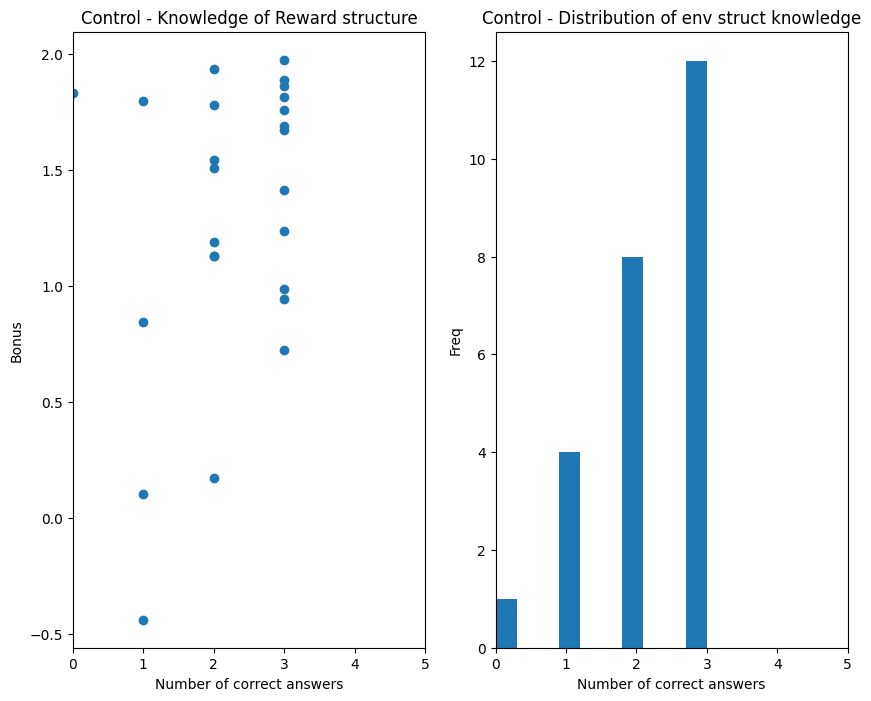

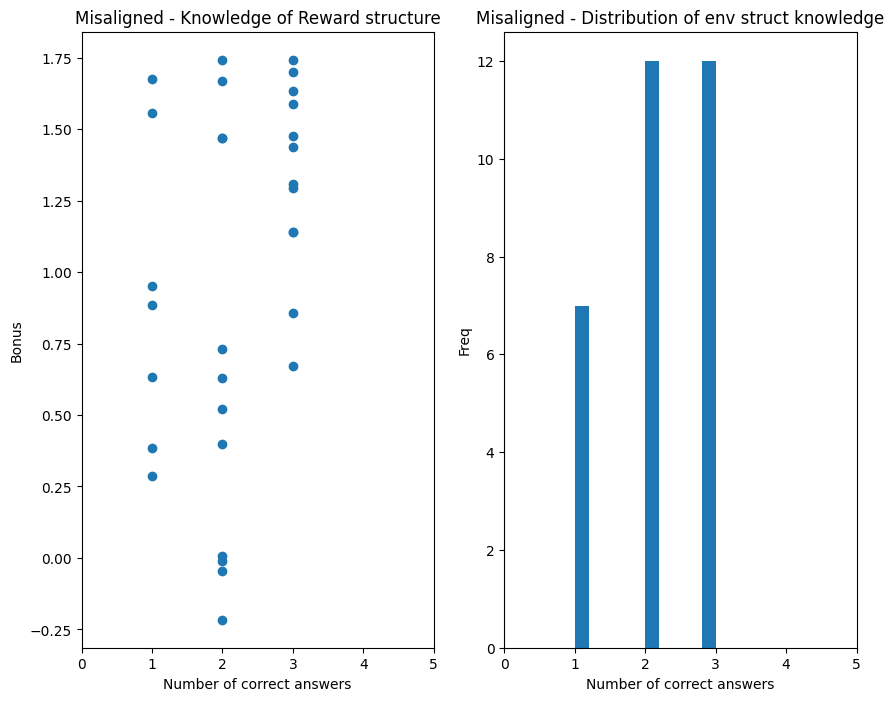

In [49]:


for idx, (cond, condname) in enumerate(conditions.items()):
    plt.figure(figsize=(5 * len(conditions),4 * 2))
    plt.subplot(1,2,1)
    plt.scatter(num_correct[cond], bonus[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Bonus")
    plt.title(f"{condname} - Knowledge of Reward structure")
    plt.xlim([0,5])
    plt.subplot(1,2,2)
    plt.hist(num_correct[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Freq")
    plt.xlim([0,5])
    plt.title(f"{condname} - Distribution of env struct knowledge")

plt.show()

In [50]:
questions_correct

{0: {'Q0': 19, 'Q1': 14, 'Q2': 23}, 1: {'Q0': 24, 'Q1': 17, 'Q2': 26}}